In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sqlite3 import connect

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task 4: Столбиковые диаграммы**
Что, если среднее количество коммитов отличается для рабочих дней и выходных?

Выполните необходимые шаги по созданию следующего графика: 


1.   Анализируйте только пользователей, а не администраторов.
2.   Используйте фильтр status = 'ready' для коммитов.
3.   Размеры шрифта и figsize такие же, как и раньше.
4.   Для каждого часа подсчитайте среднее количество коммитов в рабочие дни и в выходные (если в течение часа в одну из дат не было коммитов, не используйте его для расчета среднего значения). Используйте эти значения для расчета средних в категории "рабочие дни" и в категории "выходные" и дальнешего построения графика, например: понедельник, 17–18: 5 коммитов; вторник, 17–18: 6 коммитов; среда, 17–18: 7 коммитов.
5.   Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.

In [4]:
conn = connect('/content/drive/MyDrive/Школа 21/DS_project 12 Pandas, SQL, визуализация данных/checking-logs.sqlite')

In [5]:
sql_command = '''
SELECT
    timestamp AS commit_time    
FROM
    checker
WHERE
     status = 'ready'
     and uid like 'user_%'    
'''

In [6]:
df = pd.read_sql(sql_command, conn, parse_dates=['commit_time'])
df.head()

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   commit_time  1686 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.3 KB


In [8]:
df['hour'] = df['commit_time'].dt.hour
df['day'] = df['commit_time'].dt.date
df['weekday'] = df['commit_time'].dt.weekday.apply(lambda x: 'weekend' if x > 4 else 'working_day')
df

,commit_time,hour,day,weekday
0,2020-04-17 05:19:02.744528,5,2020-04-17,working_day
1,2020-04-17 05:22:45.549397,5,2020-04-17,working_day
2,2020-04-17 05:34:24.422370,5,2020-04-17,working_day
3,2020-04-17 05:43:27.773992,5,2020-04-17,working_day
4,2020-04-17 05:46:32.275104,5,2020-04-17,working_day
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,20,2020-05-21,working_day
1682,2020-05-21 20:18:54.487900,20,2020-05-21,working_day
1683,2020-05-21 20:19:06.872761,20,2020-05-21,working_day
1684,2020-05-21 20:22:41.877806,20,2020-05-21,working_day


In [9]:
#группируем
df = df.groupby(by=['hour', 'day', 'weekday'], as_index=False)\
   .agg({'commit_time': 'count'})\
   .rename(columns={'commit_time': 'commits'})

In [10]:
df.head()

,hour,day,weekday,commits
0,0,2020-04-19,weekend,1
1,0,2020-04-23,working_day,2
2,0,2020-04-26,weekend,1
3,0,2020-05-10,weekend,1
4,0,2020-05-14,working_day,2


In [11]:
#посчитаем средний коммит в каждом часовом интервале в будние и выходные дни
df = df.groupby(by=['weekday','hour'], as_index=False).agg({'commits': 'mean'})
df.head()

,weekday,hour,commits
0,weekend,0,1.0
1,weekend,1,3.0
2,weekend,3,1.0
3,weekend,5,1.0
4,weekend,7,2.5


In [12]:
df = pd.pivot(df, index='hour', columns='weekday', values='commits')
df.head()

weekday,weekend,working_day
hour,,
0,1.0,2.0
1,3.0,NaN
3,1.0,1.0
5,1.0,4.0
6,NaN,1.0


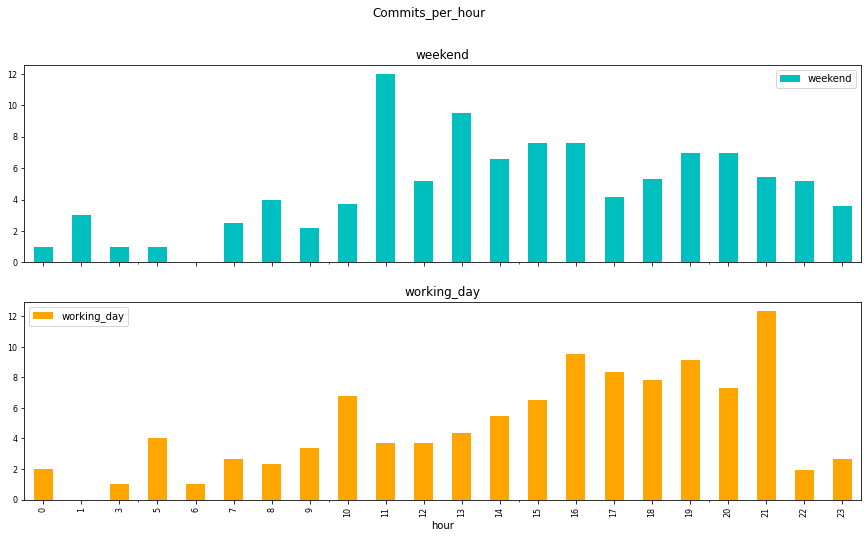

In [16]:
df.plot(y=['weekend', 'working_day'],
          kind='bar',
          subplots=True,
          fontsize=8,
          figsize=(15,8),
          title='Commits_per_hour',
          xlabel='hour',
          rot=90,
          color=['c', 'orange'])
plt.show()

**4. Закройте соединение.**

In [14]:
conn.close()

**6. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос:**

**«Отличается ли динамика в рабочие и выходные дни?». В качестве ответа добавьте значения часа, когда количество коммитов является наибольшим в рабочие дни, и часа, когда количество коммитов является наибольшим в выходные дни.**

**В рабочие дни - 21 час**

**В выходные - 11 часов**